<h1><center> <ins><b>Introduction to Modern Portfolio Theory (MPT)</b></ins> </center></h1>

<h2> <b><ins>Aims</ins></b></h2>

- Explain what Modern Portfolio Theory is
- Take a detailed look into how we can mathematically derive the ideas behind this theory
- Explain how we can use this with real historical price data
- Look at the significance of Efficient Frontiers
- Show the main crux of the problem, how we can optimise our portfolio for either minimising risk or maximising our Sharpe Ratio

<h2> <b><ins>What is MPT?</ins></b></h2>

Modern Portfolio Theory is a theory on how risk-averse investors can construct portfolios to maximise expected return based on a given level of market risk.

Given a portfolio made up of $k$ assets, where $k \in \mathbb{N}^{>0}$, we must construct it in a way such that we allocate each asset a particular weighting. This way, given an initial set amount of money we choose to invest, we can spread it across our assets by these weightings. This **diversification** ensures we have a better chance of growing our wealth over the long term while managing our risk. Now the question arises as to how we can choose the weights for each asset in a way such that we are risk-averse but still get high returns. This is the crux of the problem we are going to look into.

In order to make a start, let us consider how we can calculate the expected returns and risks of a particular portfolio.

Assuming we already have a dataframe that contains each asset's returns for each timeframe. In order to find the expected returns, there are various methods to do so. We could simply take the mean of returns for each asset and then annualise them. Or we could use a compound method where instead of looking at returns on a timeframe basis, we assume compound returns. Alternatively, we could calculate an Exponential Weighted Average for each asset's returns, please refer to the Technical Indicators notebook for further information on this. Additionally, we could calculate returns using a Capital Asset Pricing Model (CAPM), where asset returns are equal to market returns plus a term encoding the relative risk of the asset.

We can then calculate the risk by calculating the standard deviation (volatility) of returns within our portfolio and represent this as a function of the correlations of the component assets, for all asset pairs. The volatility gives insight into the risk which is associated with the investment. The higher the volatility, the higher the risk.

<h2> <b><ins>How can we formally write this?</ins></b> </h2>

Firstly, we will introduce some notation to show the ideas explained above.

- $k$ : The number of assets we have in our portfolio, where $k \in \mathbb{N}^{>0}$
- $S_{i}$ : Today's value of the $i$th asset, where $1\le i\le k$
- $R_{i}$ : The $i$th asset's returns over a given time period, $T$, which is normally distributed with a mean of $\mu_{i}T$ and standard deviation of $\sigma_{i}\sqrt{T}$

Now suppose we have $w_{i}$ of the $i$th asset $\forall \,k \in [1,k]$. So we can say the value of our portfolio now $\left(\Pi\right)$ is
$$\Pi = \sum_{i=1}^{k}w_{i}S_{i}$$
After our time period has passed, we can say that the value of each asset has increased by $S_{i}R_{i}$ and so, the portfolio value has increased by $\delta \Pi$ where
$$\delta \Pi = \sum_{i=1}^{k}w_{i}S_{i}R_{i}$$
Now we can say that the relative change in value of our portfolio after said time period is,
$$\frac{\delta \Pi}{\Pi}=\frac{\sum_{i=1}^{k}w_{i}S_{i}R_{i}}{\sum_{i=1}^{k}w_{i}S_{i}}$$
$$=\sum_{i=1}^{k}\frac{w_{i}S_{i}R_{i}}{\sum_{i=1}^{k}w_{i}S_{i}}$$
$$=\sum_{i=1}^{k}W_{i}R_{i}$$
where $W_{i}=\frac{w_{i}S_{i}}{\sum_{i=1}^{k}w_{i}S_{i}}$ and correspond to the **weights** we discussed earlier. Note, how $\sum_{i=1}^{k}W_{i}=1$.

Now to calculate our expected returns on our portfolio $\left(\mu_{\Pi}\right)$ over a time period of $T$, so we can say
$$\mu_{\Pi}=\text{E}\left[\frac{\delta \Pi}{\Pi}\right]=\text{E}\left[\sum_{i=1}^{k}W_{i}R_{i}\right]$$
By the linearity of expectation,
$$\mu_{\Pi}=\sum_{i=1}^{k}W_{i}\,\text{E}\left[R_{i}\right]=\sum_{i=1}^{k}W_{i}\,\mu_{i}$$
where $\mu_{i}=\text{E}\left[R_{i}\right]$ (the expected return)

Now we will calculate the variance of the returns on our portfolio $\left(\sigma_{\Pi}^{2}\right)$ over a time period of $T$, so we can say
$$\sigma_{\Pi}^{2}=\text{Var}\left[\frac{\delta \Pi}{\Pi}\right]=\text{Var}\left[\sum_{i=1}^{k}W_{i}R_{i}\right]=\sum_{i=1}^{k}\sum_{j=1}^{k}\text{Cov}\left[W_{i}R_{i},W_{j}R_{j}\right]$$
By the linearity of variance,
$$\sigma_{\Pi}^{2}=\sum_{i=1}^{k}\sum_{j=1}^{k}W_{i}W_{j}\text{Cov}\left[R_{i},R_{j}\right]$$
$$=\sum_{i=1}^{k}\sum_{j=1}^{k}W_{i}W_{j}\sigma_{i}\sigma_{j}\rho_{ij}$$
where $\rho_{ij}$ is the **correlation coefficient** between the returns on assets $i$ and $j$.
So we can say that the standard deviation of the returns on our portfolio (which we refer to as the volatility/risk) is
$$\sigma_{\Pi}=\sqrt{\sum_{i=1}^{k}\sum_{j=1}^{k}W_{i}W_{j}\sigma_{i}\sigma_{j}\rho_{ij}}$$

However, we can greatly simplify this by instead of dealing with summations and algebra, converting these into vectors and matrices. This is significantly more compact and efficient.

In order to do this, we will let $\mathbf{w} \in \mathbb{R}^{k\times 1}$ represent a column vector with entries of each derivate's weighting we discussed above. And we will let $\boldsymbol{\mu} \in \mathbb{R}^{k\times 1}$ represent a column vector with entries of each derivate's expected returns as discussed above.

When we consider $\mu_{\Pi}=\sum_{i=1}^{k}W_{i}\,\mu_{i}$, we can simplify this to $\mu_{\Pi}=\mathbf{w}^{T}\boldsymbol{\mu}$

Finally, upon considering $\sigma_{\Pi}^{2}=\text{Var}\left[\sum_{i=1}^{k}W_{i}R_{i}\right]$, we can equate this to $\text{Var}\left[\mathbf{w}^{T}\mathbf{R}\right]$. And by using a covariance matrix $\left(\boldsymbol{\Sigma}\right)$, we can say $\sigma_{\Pi}^{2}=\text{Var}\left[\mathbf{w}^{T}\mathbf{R}\right]=\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}$

Let us reflect on what we have covered. Given a vector of weights for each asset, denoted by $\mathbf{w}$, a vector of expected returns for each asset, denoted by $\mathbf{\mu}$, and a covariance matrix of returns, denoted by $\Sigma$, we can say
$$\mu_{\Pi} = \mathbf{w}^{T}\boldsymbol{\mu} \tag{x}$$
$$\sigma_{\Pi}^{2}=\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w} \tag{x}$$

<h2> <b><ins>How do we use this?</ins></b> </h2>

Although it is all well and good deriving these formulae to calculate the expected returns and risk of a portfolio, in practice how would we calculate our individual asset's expected returns and a covariance matrix from said returns? In order to better understand this, we will tackle both calculations individually in detail.

<h2> <b><ins>Expected returns</ins></b> </h2>

Expected returns are rather difficult to know with any certainty, thus the best we can do is to come up with estimates, for example by extrapolating historical data. So suppose we have a dataframe of OHLC historical price data from various assets in our portfolio. For each time step, whether it be a day or hours or minutes, we can calculate each time period's returns easily using the following formula. For time $t$ the return at time $t+\delta t$ $\left(R_{t+\delta t}\right)$ is,
$$R_{t+\delta t}=\frac{\text{Close}_{t+\delta t}-\text{Close}_{t}}{\text{Close}_{t}}$$

Using this, we can construct a dataframe that is full of each asset's returns on a specified time period basis. Then to calculate the **expected** returns, there are various ways we could go about this. We will cover 3 main methods as listed below:

- Mean
- Exponentially Weighted Mean
- Capital Asset Pricing Model (CAPM)

<h3> <ins>Mean</ins> </h3>

This is the simplest way to calculate our expected returns for each asset and we simply use the following formula
$$\mu_{i} = \frac{252}{n}\sum_{i=1}^{n}R_{i}$$
where $n$ is the number of time steps we have in our dataframe and we multiply by 252 to annualise our returns

However, in order to use annualised compound returns we would be more accurate using the following formula
$$\mu_{i} = \left[\prod_{i=1}^{n}\left(1+R_{i}\right)\right]^{\frac{252}{n}}-1$$

<h3> <ins>Exponentially Weighted Mean</ins> </h3>

This is an alternate way, where we place a greater weight and significance on the most recent closing prices. We cover this in greater detail in our **Technical Indicators** notebook.

<h3> <ins>CAPM</ins> </h3>

The capital asset pricing model is a financial model that estimates the expected return of an investment based on its systematic risk (market-related risk). It is calculated by using the expected return on both the market and a risk-free asset, and the asset’s correlation or sensitivity to the market (beta). It can be calculated using the following formula
$$\mu_{i}=R_{f}+\beta_{i} \left(\mu_{m}-R_{f}\right)$$
where<br>
- $R_{f}$ is the risk-free rate (such as the treasury bond yield)<br>
- $\mu_{m}$ is the expected return of the market<br>
- $\beta_{i}$ is a measure of the sensitivity of asset $i$ to the market<br>
- $\mu_{m}-R_{f}$ is the market risk premium (extra return for market risk)

We can calculate $\mu_{m}$ easily using either the Mean or EWM methods above and then calculate $\beta_{i}$ using a covariance matrix which we will cover in more detail when we implement this into code.

<h2> <b><ins>Risk Models</ins></b> </h2>

As can be seen in equation (), in order to evaluate the risk of a portfolio, we require a covariance matrix from the $k$ assets. Thus, we must consider how we can calculate said covariance matrix. As with expected returns, there are various ways we can do this. 

- Sample Covariance
- Semi Covariance
- Exponentially Weighted Covariance
- Shrinkage Estimated Covariance (Ledoit-Wolf or Oracle Approximating)

<h2> <b><ins>Which model do we use?</ins></b> </h2>

Given so many models and methods one could go about calculating a portfolio's expected returns and risk, the question is which way is best. For our purposes we will continue with calculating expected returns using a CAPM, and risk using a Ledoit-Wolf Shrinkage Estimator.

<h2> <b><ins>Example</ins></b></h2>

Having explained how to calculate a portfolio's expected returns and risk, given information about each asset's weight and returns in the portfolio. Let us consider a simple example below. Suppose we have a portfolio made up of 2 stocks (AAPL,GOOG) with weights of (0.6,0.4) respectively. Let us begin by downloading the daily price data of both stocks and calculating the daily returns.

In [3]:
# Importing necessary libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import covariance
from sklearn.covariance import ledoit_wolf
import cvxpy as cp

In [4]:
# Download historical data (OHLCV)
start_date = '2018-01-01'
end_date = '2025-03-01'
stocks = ['AAPL','AMZN']
df = yf.download(stocks,
                 interval = '1d', # Change interval if need be
                 start = start_date,
                 end = end_date,
                 #period = 'max', # Option to download prices as far back as possible
                 auto_adjust = True,
                 multi_level_index = False)
df.index = pd.to_datetime(df.index)
# We only require the closing prices
df=df['Close']
# Calculate daily returns
ret_df=df.pct_change().dropna()
ret_df

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,AMZN
Date,,
2018-01-03,-0.000174,0.012775
2018-01-04,0.004645,0.004476
2018-01-05,0.011385,0.016163
2018-01-08,-0.003714,0.014425
2018-01-09,-0.000115,0.004676
...,...,...
2025-02-24,0.006312,-0.017869
2025-02-25,-0.000243,0.000423
2025-02-26,-0.027040,0.007284


Now we will use our CAPM to calculate each stock's expected returns

In [5]:
# Calculate mean returns
temp = ret_df.copy()
temp['mean_ret'] = ret_df.mean(axis=1)

# Calculate covariances of returns and mean returns and then betas and mean market return
cov = temp.cov()
beta = cov["mean_ret"] / cov.loc["mean_ret", "mean_ret"]
beta = beta.drop('mean_ret')
mean_mkt_ret = (1 + temp['mean_ret']).prod() ** (252 / len(temp['mean_ret'])) - 1

# Calculate expected returns
risk_free_rate = 0.041
mu = risk_free_rate + beta * (mean_mkt_ret - risk_free_rate)
mu

Ticker
AAPL    0.237044
AMZN    0.267737
Name: mean_ret, dtype: float64

Now we will use a Ledoit-Wolf Shrinkage Estimator to calculate the covariance matrix

In [6]:
# Covariance matrix
cov, shrinkage = ledoit_wolf(ret_df)
cov = cov*252
cov

array([[0.09311184, 0.06116217],
       [0.06116217, 0.11702843]])

Now we can substitute these values into equations () and () to calculate our portfolio's expected returns and risks

In [7]:
# Our chosen weights
w = np.array([0.6,0.4])

# Calculate portfolio returns and risks
p_ret = w.dot(mu).tolist()
p_risk = np.sqrt(w.T @ cov @ w).tolist()

print(f'The portfolio expected returns are {p_ret:.2f}')
print(f'The portfolio volatility is {p_risk:.2f}')

The portfolio expected returns are 0.25
The portfolio volatility is 0.29


<h2> <b><ins>What if we use different weights?</ins></b></h2>

Let us investigate how our returns/risks will be affected if we use different weights for each stock. To do this via code, we will make use of NumPy's Dirichlet Distribution so we can create multiple random vectors that sum to 1.

In [8]:
rf = 0.041
p_rets = []
p_risks = []
p_weights = []
p_sr = []
for _ in range(10000):
    w = np.random.dirichlet(np.ones(2))
    p_weights.append(w)
    p_ret = (w.T @ mu).tolist()
    p_rets.append(p_ret)
    p_risk = np.sqrt(w.T @ cov @ w).tolist()
    p_risks.append(p_risk)
    p_sr.append((p_ret - rf) / p_risk)


ef = pd.DataFrame({'risk': p_risks, 'ret': p_rets, 'weights': p_weights, 'sharpe_ratio': p_sr})
ef

,risk,ret,weights,sharpe_ratio
0,0.332967,0.265964,"[0.057769464156869274, 0.9422305358431308]",0.675634
1,0.292070,0.241812,"[0.8446583766736147, 0.15534162332638546]",0.687548
2,0.333090,0.265989,"[0.056958281278177605, 0.9430417187218224]",0.675458
3,0.309184,0.260513,"[0.23537122091180732, 0.7646287790881927]",0.709974
4,0.294826,0.255846,"[0.38740772851372235, 0.6125922714862778]",0.728723
...,...,...,...,...
9995,0.285533,0.247547,"[0.6578037833053356, 0.3421962166946642]",0.723375
9996,0.311413,0.261102,"[0.2161775517117252, 0.7838224482882749]",0.706783
9997,0.304046,0.259052,"[0.28295122913293325, 0.7170487708670669]",0.717167
9998,0.303676,0.237481,"[0.9857505949319761, 0.014249405068023807]",0.647010


In [9]:
# Split our data by points above\below the min risk point
idx = ef.risk.idxmin()
split = ef.iloc[idx]['ret']
ef1 = ef[ef['ret'] >= split]
ef2 = ef[ef['ret'] < split]

stocks_ret = mu.to_numpy()
stocks_risk = np.sqrt(np.diag(cov))

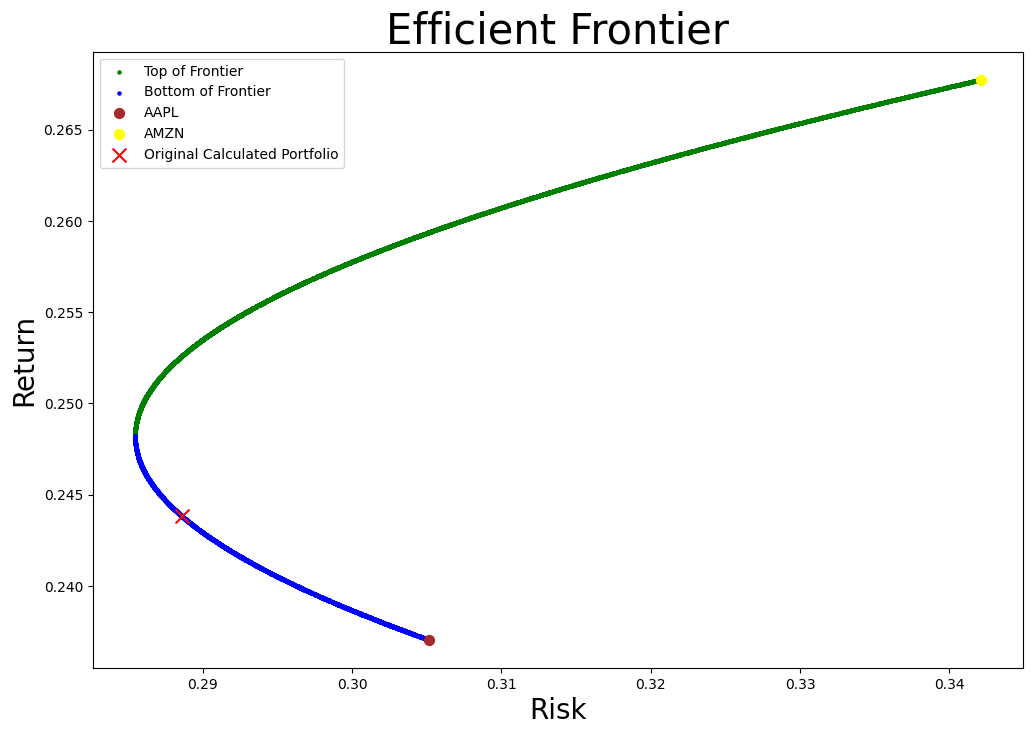

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(ef1.risk, ef1.ret, s=5, c='green', label='Top of Frontier')
plt.scatter(ef2.risk, ef2.ret, s=5, c='blue', label='Bottom of Frontier')
plt.scatter(stocks_risk[0],stocks_ret[0], s=50, c='brown', label=stocks[0])
plt.scatter(stocks_risk[1],stocks_ret[1], s=50, c='yellow', label=stocks[1])
plt.scatter(p_risk, p_ret, s=100, c='red', marker='x', label='Original Calculated Portfolio')
plt.xlabel('Risk', fontsize=20)
plt.ylabel('Return', fontsize=20)
plt.title('Efficient Frontier', fontsize=30)
plt.legend()
plt.show()

As can be expected due to our equations () and () which are in the form of a hyperbola, we can see that our possible portfolio returns\risks for various weights form the shape of a hyperbola as shown above. However, for all the possible weights we could assign to our portfolio assets, how do we know which to choose?

In an ideal world, we would want the highest return possible with the lowest risk possible. So, it should be clear that we should always choose a portfolio where we are in the top half of the hyperbola (the green part in the plot above). However, now we need to consider where is best along the green curve to be to have the optimal portfolio. The further to the right we are, the more returns we get **but** the more risk there is. There are various ways we can do this but let us set out the problem first.

<h2> <b><ins>Optimising Portfolio</ins></b> </h2>

There are various ways we can optimise our portfolio, specifically what we are seeking to minimise or maximise. We will cover 3 popular optimisers:

- Minimising our portfolio's risk
- Maximising Sharpe Ratio

<h3> <ins>Minimsing Risk</ins> </h3>

From above, it is clear that in order to minimise risk, we can just simply take the furthest left portfolio in our efficient frontier, however this is not efficient since there may be a portfolio to the right with significantly higher returns with only slightly higher risks. Therefore to avoid this, we can set a target return we want to achieve from our portfolio and ensure our weights achieve this. Let us set this out formally, so we want to find a set of weights, $\mathbf{w}$, such that
$$\mathbf{w} = \min_{\mathbf{w}}\lbrace \mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}\rbrace$$
$$\text{s.t}\,\,\,\,\mathbf{w}^{T}\boldsymbol{\mu} \ge \mu^{*},\,\,\lVert \mathbf{w} \rVert_{1}=1\,\,\text{and}\,\,w_{i}\ge 0,\,\,\forall i \in \left[1,k\right]$$
where $\mu^{*}$ represents some target return value that we would like to exceed.

There are 2 ways we can go about solving this. We can do this
1) **Analytically** - using Lagrange multipliers
2) **Numerically** - using CvxPy's minimise optimiser

We will cover the analytic solution in a separate notebook so let us proceed with the numerical solution

<h3> <ins>Numerical Solution</ins> </h3>

For this, we will make use of the library CvxPy, a convex optimisation solver.

In [11]:
# Set target return value (here we want at least a 15% annual return)
ret_min = 0.15

# Create cvxpy variable to minimize (2 dimensional since we are dealing with a portfolio of 2 stocks)
w = cp.Variable(2)

# Construct the objective function and constraints
obj = cp.Minimize(w.T @ cov @ w)
const = [cp.sum(w) == 1, w >= 0,
         w.T @ mu - ret_min >= 0]

# Solve
prob = cp.Problem(obj, const)
opt_v = prob.solve()

# Square root to get standard deviation (risk)
w_opt_mr = w.value
ret_opt_mr = w_opt_mr.T @ mu
risk_opt_mr = np.sqrt(opt_v)

print('Numerical Solution:')
print('For our efficient risk minimising optimisation, we achieve results of:\n')
print('Return (%):', np.round(ret_opt_mr*100, 5))
print('Risk (%):', np.round(risk_opt_mr*100, 5))
print('Weights:', np.round(w_opt_mr, 5))

Numerical Solution:
For our efficient risk minimising optimisation, we achieve results of:

Return (%): 24.82108
Risk (%): 28.54606
Weights: [0.63617 0.36383]


<h3> <ins>Maximising Sharpe Ratio</ins> </h3>

As discussed previously, the Sharpe ratio compares the return of an investment with its risk. We can calculate it using the following formula
$$\text{Sharpe Ratio} = \frac{R_{p}-R_{f}}{\sigma_{p}}$$
where:
- $R_{p}$ is the expected returns of our portfolio
- $R_{f}$ is the risk-free rate
- $\sigma_{p}$ is the risk of the portfolio

However in the context of our equations and models, we will write this slightly different to
$$\text{Sharpe Ratio} = \frac{\mathbf{w}^{T}\boldsymbol{\mu}-R_{f}}{\sqrt{\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}}}$$
Since our weights sum to 1, we can say $\mathbf{w}^{T} \cdot \mathbf{1} = 1$. So,
$$\text{Sharpe Ratio} = \frac{\mathbf{w}^{T}\boldsymbol{\mu}-\mathbf{w}^{T} \cdot \mathbf{1} \cdot R_{f}}{\sqrt{\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}}} = \frac{\mathbf{w}^{T}\left(\boldsymbol{\mu}-R_{f}\right)}{\sqrt{\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}}}$$


So we want to find a set of weights, $\mathbf{w}$, such that
$$\mathbf{w} = \max_{\mathbf{w}}\left\{\frac{\mathbf{w}^{T}\left(\boldsymbol{\mu}-R_{f}\right)}{\sqrt{\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}}}\right\}$$
$$\text{s.t}\,\,\,\,\lVert \mathbf{w} \rVert_{1}=1\,\,\text{and}\,\,w_{i}\ge 0,\,\,\forall i \in \left[1,k\right]$$

However, in order to use CvxPy, we require a strict convex optimisation obejective. Here we are maximizing a ratio of a linear term and a square root of a quadratic, which is clearly not strictly convex. Although we could use alternate methods without this restriction, we can simply scale and transform our problem.

Firstly, we will fix $\mathbf{w}^{T}\left(\boldsymbol{\mu}-R_{f}\right) = 1$. That way, in our efforts to **maximise** $\frac{\mathbf{w}^{T}\left(\boldsymbol{\mu}-R_{f}\right)}{\sqrt{\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}}}$, we can simply **minimise** $\sqrt{\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}}$. Since $\sqrt{x} \ge 0\,\,\,\forall x \in \mathbb{R}$, we can simply minimise $\mathbf{w}^{T}\boldsymbol{\Sigma} \mathbf{w}$.

However, if we proceed with finding a set of weights that satisfies the above conditions, we have forgone one important condition mentioned previously, that we require $\lVert \mathbf{w} \rVert_{1}=1$. There is no guarantee this holds, so let us assume that $\lVert \mathbf{w} \rVert_{1}= k$ for some $k \in \mathbb{R}$. Then we can simply scale our weights by a factor of $\frac{1}{k}$ to achieve a set of weights that sum to 1, but still minimise the problem above.

So formally, we seek to find a set of weights, $\mathbf{w}^{*}$, such that
$$\mathbf{w}^{*} = \min_{\mathbf{w}^{*}}\left\{\left(\mathbf{w}^{*}\right)^{T}\boldsymbol{\Sigma} \mathbf{w}^{*}\right\}$$
$$\text{s.t}\,\,\,\,\left(\mathbf{w}^{*}\right)^{T}\left(\boldsymbol{\mu}-R_{f}\right) = 1\,\,\text{and}\,\,w_{i}^{*}\ge 0,\,\,\forall i \in \left[1,k\right]$$

Having found a set of weights, we finally scale them to ensure they sum to 1. So the set of weights that maximises the Sharpe Ratio is
$$\mathbf{w} = \frac{\mathbf{w}^{*}}{\lVert \mathbf{w}^{*} \rVert_{1}}$$

Let us implement this into our simple example.

In [12]:
# Risk-free rate
rf = 0.041

# Create cvxpy variable to minimize (2 dimensional since we are dealing with a portfolio of 2 stocks)
w = cp.Variable(2)
k = cp.Variable()

# Construct the objective function and constraints
obj = cp.Minimize(w.T @ cov @ w)
# 
const = [w.T @ (mu.to_numpy() - rf) == 1,
         cp.sum(w) == k,
         k >= 0]

# Solve
prob = cp.Problem(obj, const)
temp = prob.solve()

# 
w_opt_msr = w.value/k.value
ret_opt_msr = w_opt_msr.T @ mu
risk_opt_msr = np.sqrt(w_opt_msr.T @ cov @ w_opt_msr)

print('For our sharpe ratio maximising optimisation, we achieve results of:\n')
print('Return (%):', round(ret_opt_msr*100, 5))
print('Risk (%):', round(risk_opt_msr*100, 5))
print('Weights:', np.round(w_opt_msr, 5))

For our sharpe ratio maximising optimisation, we achieve results of:

Return (%): 25.24295
Risk (%): 28.83518
Weights: [0.49873 0.50127]


<h2> <ins>Plotting Efficient Frontier</ins> </h2>

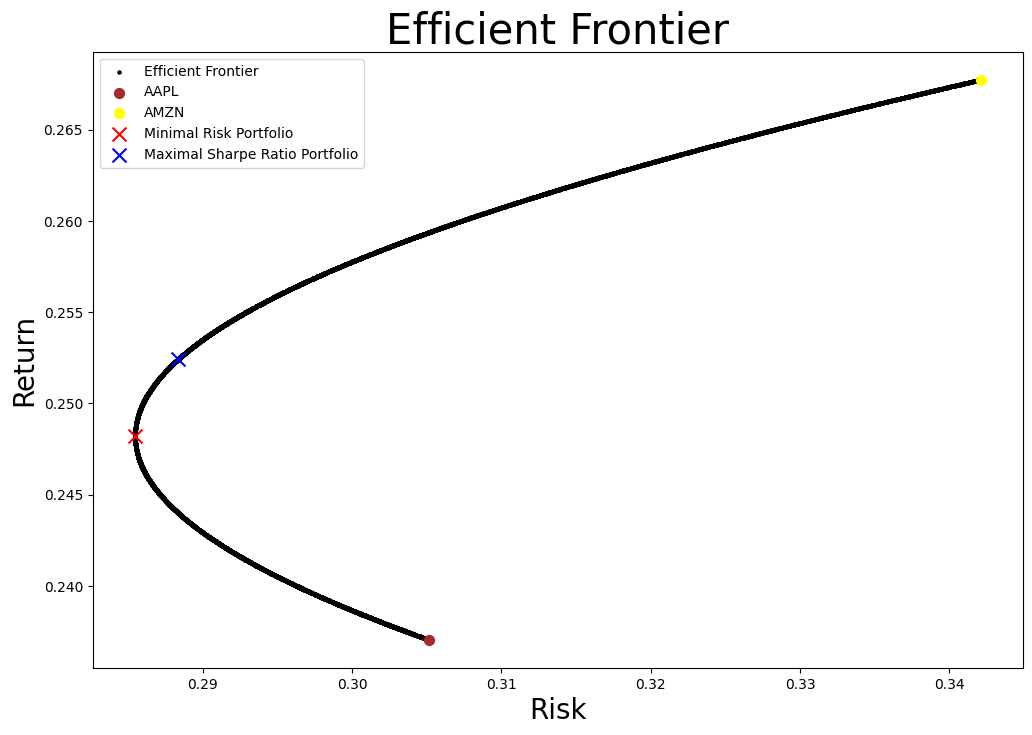

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(ef.risk, ef.ret, s=5, c='black', label='Efficient Frontier')
plt.scatter(stocks_risk[0],stocks_ret[0], s=50, c='brown', label=stocks[0])
plt.scatter(stocks_risk[1],stocks_ret[1], s=50, c='yellow', label=stocks[1])
plt.scatter(risk_opt_mr, ret_opt_mr, s=100, c='red', marker='x', label='Minimal Risk Portfolio')
plt.scatter(risk_opt_msr, ret_opt_msr, s=100, c='blue', marker='x', label='Maximal Sharpe Ratio Portfolio')
plt.xlabel('Risk', fontsize=20)
plt.ylabel('Return', fontsize=20)
plt.title('Efficient Frontier', fontsize=30)
plt.legend()
plt.show()

<h2> <b><ins>Translating Portfolio Weights to Stock Allocations</ins></b> </h2>

Although we have found a set of optimal weights that will results in the best portfolio, these mean nothing by themselves in reality since we cannot always simply take our total investment, divide it by the weights and buy that much of a stock. For some assets, we can only buy an integer amount of it and so we need to find a way to distribute our investment in an optimal way. Since the first scenario is incredibly simply, let us solely look at the case where we cannot have fractional shares.

Suppose we have found an optimal set of weights $\mathbf{w}$ and are seeking to have a portfolio made up of an initial investment $I$. Now assuming we cannot have fractional shares, let $\mathbf{x}$ represent our set of number of integer shares for each asset in our portfolio. Now let $\mathbf{p}$ denote the latest prices of said assets. Let us begin by calculating and comparing what our ideal allocation to each asset is and how much money we have left over after buying as many integer shares as possible.

In an ideal world, we would like to be as close to possible to our optimal weights $\mathbf{w}$ and so ideally the price amount we would aim to invest into each asset would be $\mathbf{w}\cdot \mathbf{I}$ where $\mathbf{I}=I\cdot\mathbf{1}$. However, using our integer shares and latest prices, in reality we would be investing $\mathbf{x}\cdot \mathbf{p}$ into each asset. So, having found an optimal $\mathbf{w}$, we want to also find an optimal $\mathbf{x}$ such that we minimise the difference between $\mathbf{w}\cdot \mathbf{I}$ and $\mathbf{x}\cdot \mathbf{p}$. Defining the absolute error as $\epsilon = \lVert \mathbf{w}\cdot \mathbf{I} - \mathbf{x}\cdot \mathbf{p} \rVert_{1}$, we wish to find $\mathbf{x}$ which minimises $\epsilon$.

Moreover, after investing our money using $\mathbf{x}$ shares of each asset, we will have spent $\mathbf{x}\cdot \mathbf{p}$ from our total investment amount of $I$. So we can say that we will have a remainder amount $r$ of $r=I-\mathbf{x}\cdot \mathbf{p}$. So clearly, we seek to find $\mathbf{x}$ that minimises $r$ as well.

So our overall optimisation problem is as follows. We wish to find $\mathbf{x}$ that
$$\mathbf{x} = \min_{\mathbf{x}}\left\{r+\lVert \mathbf{w}\cdot \mathbf{I} - \mathbf{x}\cdot \mathbf{p} \rVert_{1}\right\}$$
$$\text{s.t}\,\,\,r=I-\mathbf{x}\cdot \mathbf{p}$$
where
- $I \in \mathbb{R}$ is the total investment to be allocated
- $\mathbf{p} \in \mathbb{R}^{k}$ are the latest prices of each of the $k$ assets in our portfolio
- $\mathbf{w} \in \mathbb{R}^{k}$ are the optimal weights for each of the $k$ assets we previously calculated
- $\mathbf{x} \in \mathbb{R}^{k}$ are the optimal integer shares of each of the $k$ assets we seek to find
- $r \in \mathbb{R}$ is the remainder of the total investment that we have not invested into any assets

In order to achieve this we will rely on treating this as an integer programming problem and make use of the library CvxPy.

In [14]:
# No shorting
I = 10_000
p = df.iloc[-1].to_numpy()
n = len(p)
w = w_opt_msr.astype(float)

x = cp.Variable(n, integer=True)
r = I - x.T @ p

error = w * I - cp.multiply(x, p)
u = cp.Variable(n)
constraints = [error <= u, error >= -u, x >= 0, r >= 0]
objective = cp.sum(u) + r

obj = cp.Minimize(objective)
prob = cp.Problem(obj, constraints)
prob.solve(solver="ECOS_BB")

alloc = np.rint(x.value).astype(int)
remainder = r.value

print('Our calculated allocation:\n')
print('Allocations:', alloc)
print('Leftover cash:', round(remainder, 3))

Our calculated allocation:

Allocations: [21 23]
Leftover cash: 38.92


<h2> <ins>Conclusion</ins> </h2>

